# Hall effect analysis

Use this template as a starting point to carry out the analysis tasks.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

## Standard Packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use those shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work. Here we will use the physical constants library, `scipy.constants`.  Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty. Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.
* `pandas` is a large data science package.  It's main feature is a set of methods to create and manipulate a "DataFrame," which is an enlargement of the idea of an array.  I plays well with NumPy and other packages.  We will use it mainly as a way to read files into data sets in an easy way.
* [LMFit](https://lmfit.github.io/lmfit-py/) is excellent for carrying out line and curve fits with many useful features.

## Getting Help

See the example code for a wide range of actions in notebooks created by Prof. Marjorie Olmstead and Prof. David Pengra in this repository: [**Physics431/Examples**](https://github.com/Physics431/Examples).

You can pull the examples into your environment with the following command.  (Only do this once, or you will get an error):

    git clone https://github.com/Physics431/Examples

## Task Summary

1. If not already done, enter the raw data into a spreadsheet, save the file(s) and make them available to the members of the group.  You should have at least 4 different tables: measurements for each probe plus the measurements of the magnetic field
2. Import the magnetic field measurements.  Calculate a mean and standard deviation for the magnetic field $B$ at the location of the probes between the poles.
3. Import the measurements from each probe. Calculate $2V_H$ for each value of $I_x$  for each probe, as described in the instructions.  Show a code snippet that does this or describe the calculation in your group notebook with an example.
4. Plot $2V_H$ versus $I_x$  for each sample and fit a line to it using LMfit.  Obtain the fit coefficients and their uncertainty.
5. Calculate the Hall coefficient $R_H$ for each probe and propagate the uncertainty from the fit, uncertainty in the magnetic field, and uncertainties in the probe specifications given in Table 1 in the instructions.
6. Determine the source of the largest statistical uncertainty, and explain how this was determined. 
7. Calculate the conductivity of the sample material and its uncertainty for all three samples.
8. Calculate the Hall mobility $\mu$ for the InAs probe.  (You can also calculate a mobility for the metal probes, but its meaning is suspect.)

In [266]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
%matplotlib inline

In [267]:
# Useful plot default
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font

## Read in the B-field data

If the data files are spreadsheet files with comma-separated values (CSV) they can be read in with Pandas `pd.read_csv()`:
    
    B_data = pd.read_csv('Hall_magnet_measurements.csv')


In [268]:
B_data = pd.read_csv('Hall_Effect_Magnet_Measurements.csv')
B_data

,Direction,Magnetic Field (kG)
0,Up,1.3379
1,Down,1.3140
2,Front,1.3288
3,Back,1.3223
4,Center,1.3221
5,Left,1.3215
6,Right,1.3216


Calculate the average value of the field and its standard deviation, correcting for the sign reversal.  One way to do this is to create a new NumPy array that holds all values as absolute-values, and then use the methods within the array.  

In [269]:
B = np.mean(B_data['Magnetic Field (kG)'])/10
sigma_B = np.std(B_data['Magnetic Field (kG)'])
# Divide by 10 to convert kilogauss to Tesla
print(f'Mean of the B-Field: {B:.6f}')
print(f'Standard deviation of the B-Field: {sigma_B:.6f}')

Mean of the B-Field: 0.132403
Standard deviation of the B-Field: 0.006915


In [270]:
# Create an uncertainty object that holds the field and its uncertainty.
# You need the values of B and its uncertainty 
uB = unc.ufloat(B,sigma_B,'B') # the extra label is a "tag" that can be used with some of the Uncertainties functions
print('The field strength of the magnet = {:.4uP} T'.format(uB))

The field strength of the magnet = 0.132403±0.006915 T


## Read in the probe data

As before, use `pd.read_csv()`.

Then for each, create an array that gives $2V_H$, twice the hall voltage.  Be careful with signs! 

In [271]:
Al_data = pd.read_csv('Hall_Effect_Al_data.csv')
Al_df = pd.DataFrame(Al_data)

In [272]:
Al_2VH = (Al_data['Voltage Green Wire Up (mV)'] - Al_data['Voltage Green Wire Down (mV)'])
Al_df['2 * Hall Voltage (mV)'] = Al_2VH
Al_df

,Probe Current (mA),Voltage Green Wire Up (mV),Voltage Green Wire Down (mV),Current Uncertainty,Voltage Uncertainty,2 * Hall Voltage (mV)
0,6.984,0.02531,0.02515,0.005,0.00005,0.00016
1,26.956,0.09212,0.09136,0.005,0.00005,0.00076
2,46.946,0.15918,0.15770,0.004,0.00006,0.00148
3,66.946,0.22605,0.22421,0.005,0.00005,0.00184
4,86.952,0.29324,0.29042,0.003,0.00004,0.00282
5,106.921,0.36025,0.35702,0.004,0.00006,0.00323
6,126.920,0.42778,0.42362,0.005,0.00008,0.00416
7,146.960,0.49502,0.49046,0.005,0.00004,0.00456


In [273]:
Au_data = pd.read_csv('Hall_Effect_Gold_data.csv')
Au_df = pd.DataFrame(Au_data)
Au_2VH = (Au_data['Voltage Green Wire Up (mV)'] - Au_data['Voltage Green Wire Down (mV)'])
Au_df['2 * Hall Voltage (mV)'] = Au_2VH
Au_df

,Probe Current (mA),Voltage Green Wire Up (mV),Voltage Green Wire Down (mV),Current Uncertainty,Voltage Uncertainty,2 * Hall Voltage (mV)
0,6.901,-0.00361,-0.00436,0.005,0.00005,0.00075
1,26.908,-0.01755,-0.02051,0.004,0.00005,0.00296
2,46.904,-0.03136,-0.03648,0.004,0.00006,0.00512
3,66.916,-0.04532,-0.05275,0.004,0.00007,0.00743
4,86.928,-0.05934,-0.06905,0.004,0.00005,0.00971
5,106.926,-0.07335,-0.08506,0.004,0.00006,0.01171
6,126.930,-0.08732,-0.10138,0.005,0.00008,0.01406
7,146.920,-0.10138,-0.11758,0.005,0.00005,0.01620


In [274]:
InAs_data = pd.read_csv('Hall_Effect_InAs_data.csv')
InAs_df = pd.DataFrame(InAs_data)
InAs_2VH = (InAs_data['Voltage Green Wire Up (mV)'] - InAs_data['Voltage Green Wire Down (mV)'])
InAs_df['2 * Hall Voltage (mV)'] = InAs_2VH
InAs_df

,Probe Current (mA),Voltage Green Wire Up (mV),Voltage Green Wire Down (mV),Current Uncertainty,Voltage Uncertainty,2 * Hall Voltage (mV)
0,6.902,1.221,-1.207,0.002,0.001,2.428
1,16.989,2.999,-2.965,0.004,0.001,5.964
2,26.952,4.761,-4.706,0.003,0.001,9.467
3,36.967,6.526,-6.455,0.002,0.001,12.981
4,46.952,8.297,-8.197,0.006,0.001,16.494
5,56.916,10.055,-9.930,0.004,0.001,19.985
6,66.949,11.823,-11.675,0.002,0.001,23.498
7,76.974,13.589,-13.420,0.004,0.001,27.009


## Make a couple of plots

The metal probes typically have similar Hall voltages. You should plot them on the same graph to compare, but InAs has much higher values and would need its own plot.

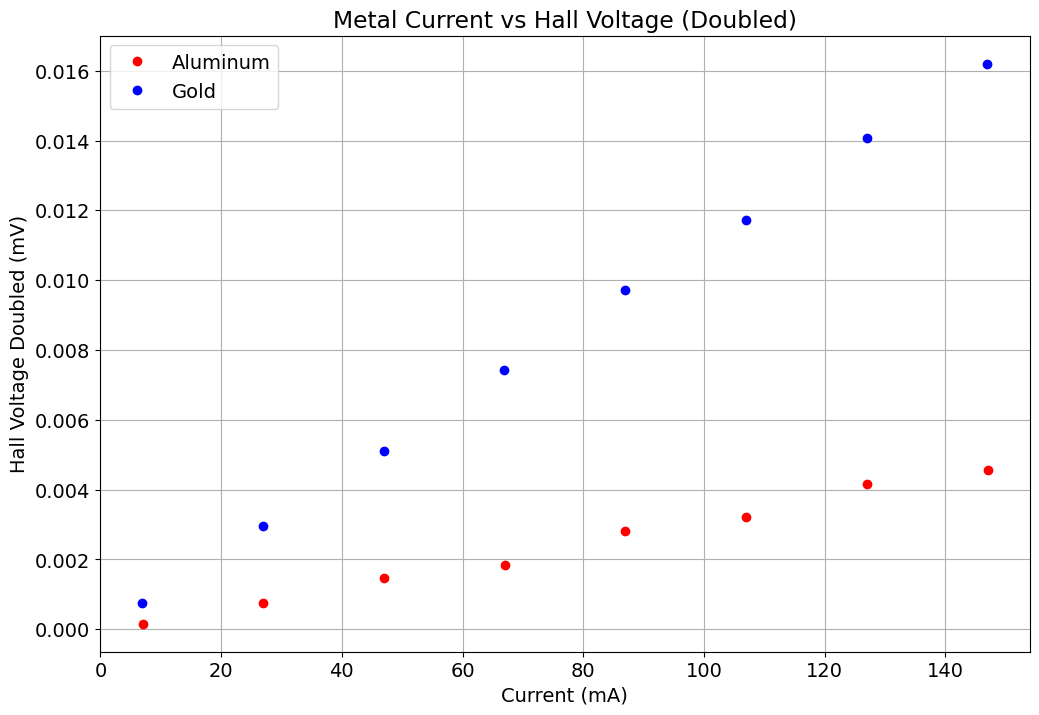

In [275]:
plt.plot(Al_data['Probe Current (mA)'],Al_2VH,'ro',label='Aluminum')
plt.plot(Au_data['Probe Current (mA)'],Au_2VH,'bo',label='Gold')
plt.legend()
plt.title('Metal Current vs Hall Voltage (Doubled)')
plt.xlabel('Current (mA)')
plt.ylabel('Hall Voltage Doubled (mV)')
plt.grid()
plt.show()

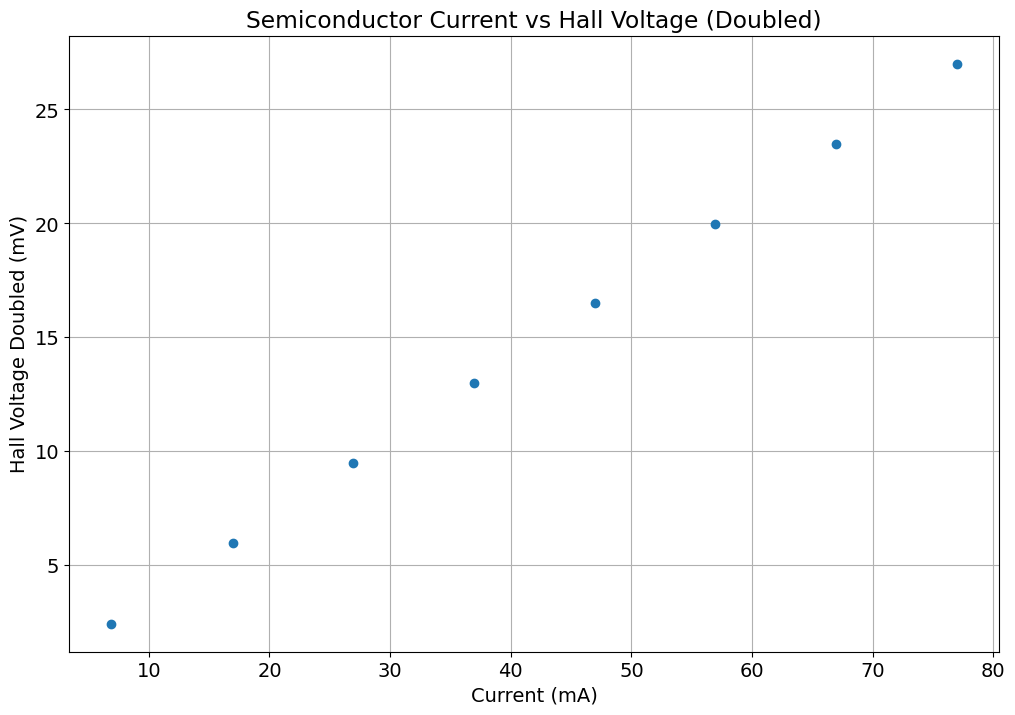

In [276]:
plt.plot(InAs_data['Probe Current (mA)'],InAs_2VH,'o')
plt.title('Semiconductor Current vs Hall Voltage (Doubled)')
plt.xlabel('Current (mA)')
plt.ylabel('Hall Voltage Doubled (mV)')
plt.grid()
plt.show()

## Fit the data to extract the slope of $2V_H/I_x$

Use LMfit.  See the examples.

In [277]:
# Set  up the Model  This cell does the import and model instance creation

# Import the Linear model.
# You only do this once in a notebook
from lmfit.models import LinearModel

# create an instance of the model
# You only need to do this once
line = LinearModel()

In [278]:
# Aluminum
Al_xdata = Al_data['Probe Current (mA)']
Al_ydata = Al_2VH
Al_guess = line.guess(Al_ydata,x=Al_xdata)
Al_fit = line.fit(Al_ydata,Al_guess,x=Al_xdata,weights=1/Al_data['Current Uncertainty'])

print('Aluminum')
print(Al_fit.fit_report())

Aluminum
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 2
    chi-square         = 0.00589040
    reduced chi-square = 9.8173e-04
    Akaike info crit   = -53.7109775
    Bayesian info crit = -53.5520945
    R-squared          = -335.764113
[[Variables]]
    slope:      3.2103e-05 +/- 1.1692e-06 (3.64%) (init = 3.216865e-05)
    intercept: -7.6203e-05 +/- 1.0340e-04 (135.70%) (init = -9.906731e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8885


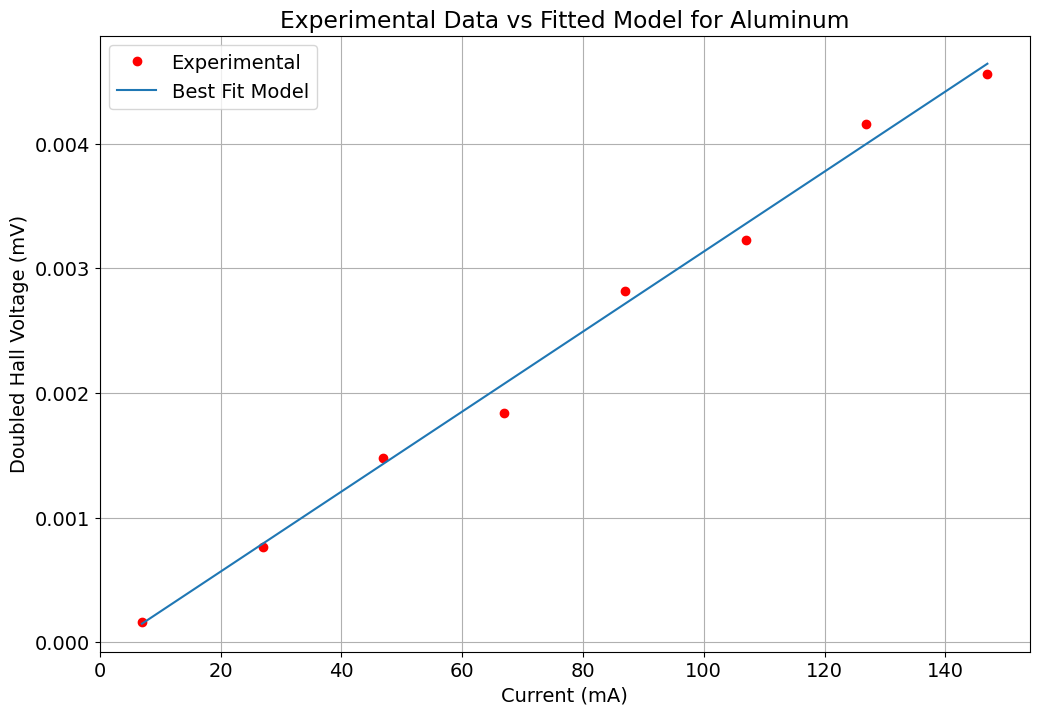

In [279]:
plt.plot(Al_xdata,Al_2VH,'ro',label='Experimental')
plt.plot(Al_xdata,Al_fit.best_fit,label='Best Fit Model')
plt.title('Experimental Data vs Fitted Model for Aluminum')
plt.xlabel('Current (mA)')
plt.ylabel('Doubled Hall Voltage (mV)')
plt.grid()
plt.legend()
plt.show()

### Extract the slope with uncertainty from the fit parameters


In [280]:
# Slope and uncertainty extraction
# Every slope extraction & hall coefficient has mV/mA, so no need to convert since they cancel each other
Al_slope = unc.ufloat(Al_fit.params['slope'].value,Al_fit.params['slope'].stderr,'Al')
print('2VH/Ix for aluminum = {:.2uP} V/A'.format(Al_slope))

2VH/Ix for aluminum = (3.21±0.12)×10⁻⁵ V/A


### Calculate the Hall coefficient

The Hall coefficient $R_H$ is related to the measurements by

$$V_H = -R_H\frac{I_xB_z}{t}$$ 

where $t$ is the thichness of the sample strip.  From the linefit, we have the slope $m = 2V_H/I_x$  so

$$R_H = -m\frac{t}{2B_z}$$

In the instructions there is a list of probe parameters.  Use these to calculate the Hall coefficient and its statistical uncertainty.


In [281]:
# For Al, from Table 1, create uncertainty object for thickness
Al_t_unc = unc.ufloat(2.34e-7,17e-9,'Al_t') # meters

# Then calculate the Hall coefficient using your uncertainty object for B and the thickness.
RH_Al = -(Al_slope * Al_t_unc)/(2*uB)

print('The Hall coefficient for the aluminum probe is {:.2uP} m^3/A-s'.format(RH_Al))

The Hall coefficient for the aluminum probe is (-2.84±0.27)×10⁻¹¹ m^3/A-s


In [282]:
# Here is an example of how to extract the relative contributions of the different
# quantities that go into the calculation.  See how the "tags" are used.

print('Percent contribution to statistical uncertainty:')
for (var,error) in RH_Al.error_components().items():
    print('{:>6s}: {:.3%}'.format(var.tag,(error/RH_Al.s)**2))

Percent contribution to statistical uncertainty:
     B: 29.231%
  Al_t: 56.555%
    Al: 14.214%


## Repeat above for other samples

### Gold probe

Comments are minimal.

In [283]:
# Gold
Au_xdata = Au_data['Probe Current (mA)']
Au_ydata = Au_2VH
Au_guess = line.guess(Au_ydata,x=Au_xdata)
Au_fit = line.fit(Au_ydata,Au_guess,x=Au_xdata,weights=1/Au_data['Current Uncertainty'])

print('Gold')
print(Au_fit.fit_report())

Gold
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 2
    chi-square         = 0.00179258
    reduced chi-square = 2.9876e-04
    Akaike info crit   = -63.2283065
    Bayesian info crit = -63.0694234
    R-squared          = -7.73176070
[[Variables]]
    slope:      1.1050e-04 +/- 6.2264e-07 (0.56%) (init = 0.0001105147)
    intercept: -7.5223e-06 +/- 5.3215e-05 (707.44%) (init = -7.91712e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8695


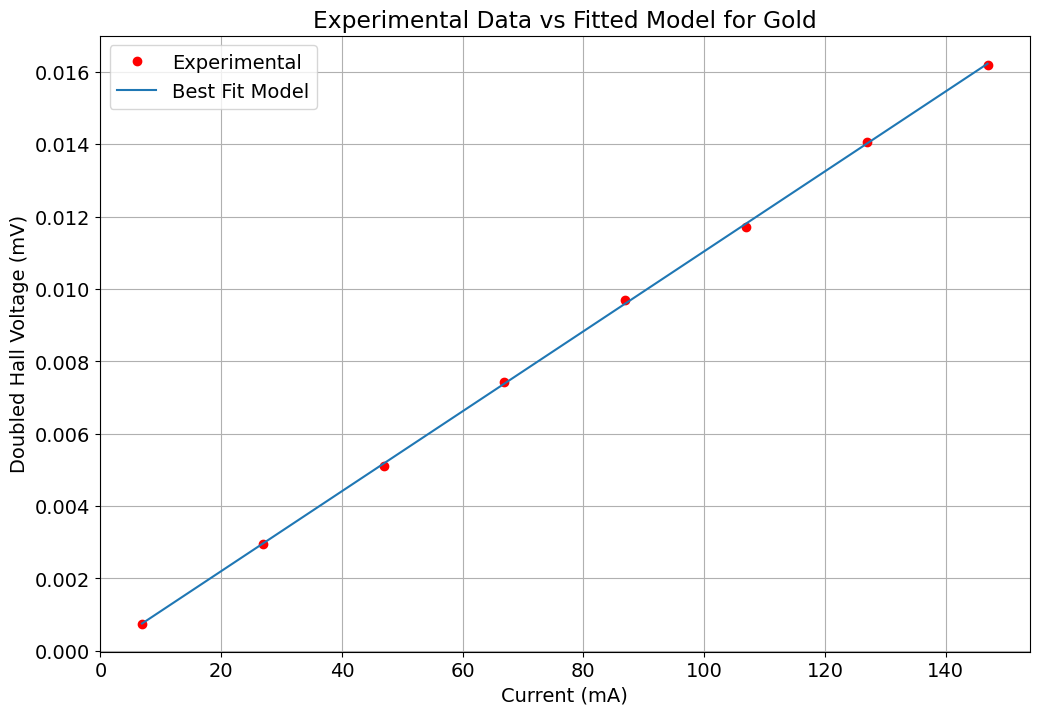

In [284]:
plt.plot(Au_xdata,Au_2VH,'ro',label='Experimental')
plt.plot(Au_xdata,Au_fit.best_fit,label='Best Fit Model')
plt.title('Experimental Data vs Fitted Model for Gold')
plt.xlabel('Current (mA)')
plt.ylabel('Doubled Hall Voltage (mV)')
plt.grid()
plt.legend()
plt.show()

In [285]:
# Slope and uncertainty extraction
Au_slope = unc.ufloat(Au_fit.params['slope'].value,Au_fit.params['slope'].stderr,'Au')
print('2VH/Ix for gold = {:.2uP} V/A'.format(Au_slope))

2VH/Ix for gold = 0.00011050±0.00000062 V/A


In [286]:
Au_t_unc = unc.ufloat(1.37e-7,16e-9,'Au_t')

# Then calculate the Hall coefficient using your uncertainty object for B and the thickness.
RH_Au = -(Au_slope * Au_t_unc)/(2*uB)

print('The Hall coefficient for the gold probe is {:.2uP} m^3/A-s'.format(RH_Au))

print('Percent contribution to statistical uncertainty:')
for (var,error) in RH_Au.error_components().items():
    print('{:>6s}: {:.3%}'.format(var.tag,(error/RH_Au.s)**2))

The Hall coefficient for the gold probe is (-5.72±0.73)×10⁻¹¹ m^3/A-s
Percent contribution to statistical uncertainty:
     B: 16.635%
  Au_t: 83.172%
    Au: 0.194%


### InAs probe

In [287]:
# Indium-Arsenide
InAs_xdata = InAs_data['Probe Current (mA)']
InAs_ydata = InAs_2VH
InAs_guess = line.guess(InAs_ydata,x=InAs_xdata)
InAs_fit = line.fit(InAs_ydata,InAs_guess,x=InAs_xdata,weights=1/InAs_data['Current Uncertainty'])

print('Indium arsenic semiconductor')
print(InAs_fit.fit_report())

Indium arsenic semiconductor
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 2
    chi-square         = 13.9897618
    reduced chi-square = 2.33162697
    Akaike info crit   = 8.47107376
    Bayesian info crit = 8.62995685
    R-squared          = 0.97295716
[[Variables]]
    slope:      0.35088236 +/- 6.1726e-05 (0.02%) (init = 0.3508814)
    intercept:  0.00785690 +/- 0.00279491 (35.57%) (init = 0.008730201)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8501


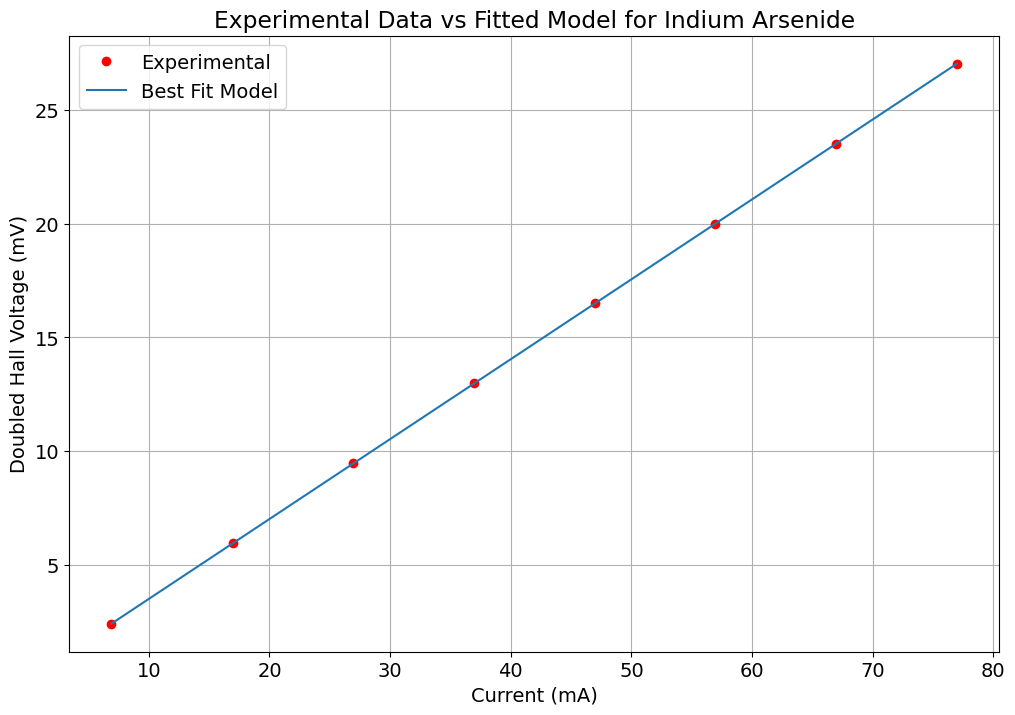

In [288]:
plt.plot(InAs_xdata,InAs_2VH,'ro',label='Experimental')
plt.plot(InAs_xdata,InAs_fit.best_fit,label='Best Fit Model')
plt.title('Experimental Data vs Fitted Model for Indium Arsenide')
plt.xlabel('Current (mA)')
plt.ylabel('Doubled Hall Voltage (mV)')
plt.grid()
plt.legend()
plt.show()

In [289]:
# Slope and uncertainty extraction
InAs_slope = unc.ufloat(InAs_fit.params['slope'].value,InAs_fit.params['slope'].stderr,'InAs')
print('2VH/Ix for Indium Arsenide = {:.2uP} V/A'.format(InAs_slope))

2VH/Ix for Indium Arsenide = 0.350882±0.000062 V/A


In [290]:
InAs_t_unc = unc.ufloat(1.26e-4,2e-6,'InAs_t')

# Then calculate the Hall coefficient using your uncertainty object for B and the thickness.
RH_InAs = -(InAs_slope * InAs_t_unc)/(2*uB)

print('The Hall coefficient for the indium arsenide probe is {:.2uP} m^3/A-s'.format(RH_InAs))

print('Percent contribution to statistical uncertainty:')
for (var,error) in RH_InAs.error_components().items():
    print('{:>6s}: {:.3%}'.format(var.tag,(error/RH_InAs.s)**2))

The Hall coefficient for the indium arsenide probe is -0.0001670±0.0000091 m^3/A-s
Percent contribution to statistical uncertainty:
     B: 91.544%
InAs_t: 8.455%
  InAs: 0.001%


## Conductivity calculations

From equation (13) in the instructions

$$\sigma = \frac{\ell}{Rwt}$$

We use the data in table 1.

In [291]:
# Create uncertainty objects from the data in Table 1 for each sample

# Gold, used same variable for Al, since the width and length are the same values
AuAl_w_unc = unc.ufloat(12.7,0.05,'AuAl_w') # millimeters
AuAl_l_unc = unc.ufloat(30.5,0.05,'AuAl_l') # millimeters
Au_R_unc = unc.ufloat(0.77,0.006,'Au_R') # Ohms

# Aluminum:
Al_R_unc = unc.ufloat(0.872,0.018,'Al_R')

# InAs:
InAs_w_unc = unc.ufloat(0.692,0.004,'InAs_w')
InAs_l_unc = unc.ufloat(1.542,0.005,'InAs_l')
InAs_R_unc = unc.ufloat(1.3,0.3,'InAs_R')

# Calculate the conductivity for each sample from the above
Au_cond = AuAl_l_unc/(Au_R_unc * AuAl_w_unc * Au_t_unc)
Al_cond = AuAl_l_unc/(Al_R_unc * AuAl_w_unc * Al_t_unc)
InAs_cond = InAs_l_unc/(InAs_R_unc * InAs_w_unc * InAs_t_unc)

# Print the results WITH UNITS for each sample
print('Conductivity of gold = {:.4uP} 1/(m * Ohms)'.format(Au_cond))
print('Conductivity of aluminum = {:.4uP} 1/(m * Ohms)'.format(Al_cond))
print('Conductivity of indium arsenide = {:.4uP} 1/(m * Ohms)'.format(InAs_cond))

Conductivity of gold = (2.2766±0.2666)×10⁷ 1/(m * Ohms)
Conductivity of aluminum = (1.17697±0.08903)×10⁷ 1/(m * Ohms)
Conductivity of indium arsenide = 13604±3148 1/(m * Ohms)


### Calculate mobility for InAs probe

(Metal probe "mobility" is optional, because it does not mean very much.) From exercise 4

$\mu = \sigma R_H$.

In [292]:
# Calculate the Carrier density of the InAs probe from the Hall coefficient and charge of the electron
# Scientific constants are in SciPy
import scipy.constants as const 
print(const.e) # electron charge in coulombs
# Calculate the carrier density and print it WITH UNITS
carrier_dens = (const.e * RH_InAs)**(-1)
# A-s = C
# Carrier density can't be negative
print(f'Carrier Density: {-carrier_dens:.4uP} m^-3')
# Calculate the mobility and print it WITH UNITS
mobility = RH_InAs * InAs_cond
# m^3/m-A-s-Ohms -> V = IR -> A-Ohms = V
# Mobility is defined as absolute value
print(f'Mobility: {-mobility:.4uP} m^2/(V-s)')


1.602176634e-19
Carrier Density: (3.7384±0.2041)×10²² m^-3
Mobility: 2.2713±0.5376 m^2/(V-s)
